In [23]:
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(file_path)

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Encode only categorical columns
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store encoders for decoding later if needed

In [25]:
X = df.drop(columns=['Play'])  # Assuming 'Play' is the target column
y = df['Play']

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)  # Using ID3
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Is This Really ID3?
✅ Yes, it is inspired by ID3 because it splits based on entropy (just like ID3).
❌ But it's not purely ID3 because:

DecisionTreeClassifier in sklearn uses binary splits (each node splits into exactly 2 branches).
ID3 can create multi-way splits, meaning it can divide into more than two branches.
sklearn's implementation follows CART (Classification and Regression Trees), which always does binary splits.

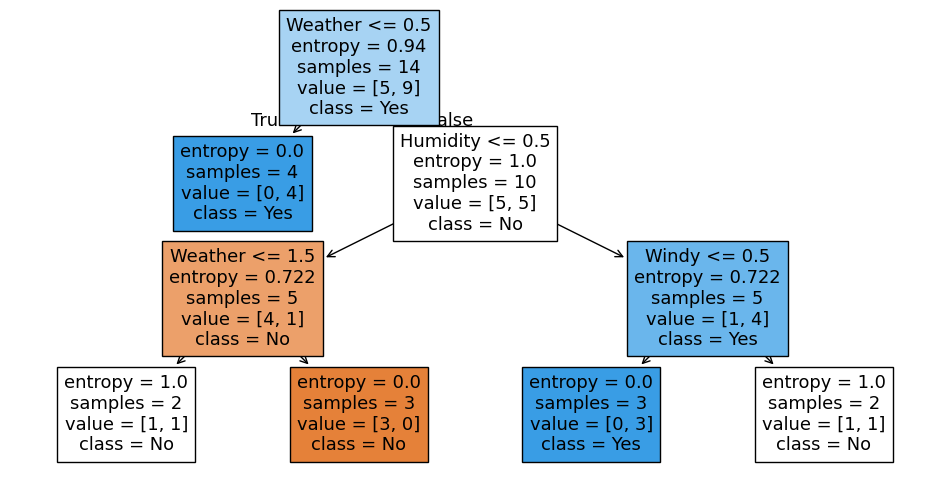

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

What Does "Humidity ≤ 0.5" Mean?
In your dataset, Humidity is a categorical variable with two possible values:

"High"
"Normal"
Since machine learning models require numerical data, you applied Label Encoding:

"High" → 0
"Normal" → 1
When the tree splits at "Humidity ≤ 0.5", it means:

Humidity = "High" (0) → Goes left
Humidity = "Normal" (1) → Goes right
Thus, 0.5 is just a numerical threshold that separates 0 and 1.

In [28]:
from sklearn.metrics import accuracy_score, classification_report

X_test = df.drop(columns=['Play'])  # Exclude target column
y_true = df['Play']

# Make predictions
y_pred = clf.predict(X_test)
report = classification_report(y_true, y_pred, target_names=['No', 'Yes'])
accuracy = accuracy_score(y_true, y_pred)
print(y_true)
print(y_pred)

print(report)
print(accuracy)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64
[0 0 1 0 1 0 1 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

          No       0.71      1.00      0.83         5
         Yes       1.00      0.78      0.88         9

    accuracy                           0.86        14
   macro avg       0.86      0.89      0.85        14
weighted avg       0.90      0.86      0.86        14

0.8571428571428571


Understanding the Classification Report
The output consists of four key metrics:

Precision → How many of the predicted positives were actually correct?
Recall → How many actual positives were correctly identified?
F1-score → A balance between precision & recall.
Support → The number of actual occurrences of each class.

"No" (Class 0):

Precision (0.71): When the model predicts "No", it is correct 71% of the time.
Recall (1.00): The model correctly identified 100% of actual "No" instances.
F1-score (0.83): A balance between precision & recall.
Support (5): There are 5 actual "No" instances in the dataset.

"Yes" (Class 1):

Precision (1.00): When the model predicts "Yes", it is correct 100% of the time.
Recall (0.78): The model correctly identified 78% of actual "Yes" instances.
F1-score (0.88): A balance between precision & recall.
Support (9): There are 9 actual "Yes" instances in the dataset.